# Mining of frequent patterns

## Basket analysis

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data
#df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df = pd.read_excel('data_sets/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
# Number of Rows and Columns
df.shape

(541909, 8)

In [5]:
# Summary of numeric columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Counts per country
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
# Cleaning the data
# Remove spaces
df['Description'] = df['Description'].str.strip()

# Drop bad rows
# Those without invoce numbers
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Change invoice number to string
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# Remove cancelled transactions
# Those with invoice letter C
df = df[~df['InvoiceNo'].str.contains('C')]

In [8]:
# Select only transactions for France
# One hot enconding of the items
basket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [9]:
# Binarizing function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [10]:
# Binarizing the table
# Absence Presence
basket_sets = basket.applymap(encode_units)
# Remove the postage (estampilla) item
# Almost constant and doesn't provide to much information
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [11]:
# So in total we have 1694 items 457
basket_sets.shape

(457, 1694)

[[]]

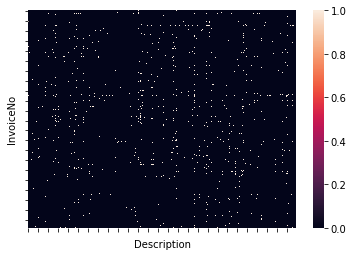

In [12]:
# Visualization of the abscence/prescence matrix
# The matrix is disperse
ax = sns.heatmap(basket_sets)
ax.set(xticklabels=[])
ax.set(yticklabels=[])

[[]]

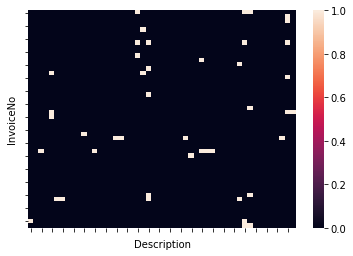

In [13]:
ax = sns.heatmap(basket_sets.iloc[0:50,0:50])
ax.set(xticklabels=[])
ax.set(yticklabels=[])

In [14]:
# Thereshold  of at least of 4%
# Frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.04, use_colnames=True)

In [15]:
# Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [16]:
# Saving the results to disk
rules.to_csv('basket_results.csv', sep=',', encoding='utf-8')

# Interesting rules
rules_interesting = rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

rules_interesting.to_csv('basket_results_top.csv', sep=',', encoding='utf-8')